In [2]:
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import os
import random
from shutil import copy
from pathlib import Path
from tqdm import tqdm
from PIL import Image

from skimage.metrics import structural_similarity as ssim
import numpy as np
from glob import glob

In [3]:
all_files = glob(str(root/'**/*.png'), recursive=True)

NameError: name 'root' is not defined

In [126]:
# change file
for f in all_files[:]:
    new_f = f.replace('_vis.png','.png').replace('__','___')
    if new_f!=f and os.path.isfile(f):
        os.rename(f, new_f)


In [4]:
root = Path('logs/2023-02-03T22-46-00_inshop_lip_clip_recon_newname/results')
casd_root = Path('../CASD/results/resize/')
nted_root = Path('../Neural-Texture-Extraction-Distribution/result/fashion_256/inference/epoch_00200_iteration_000495400/')

In [5]:
my_df = pd.read_csv(root/'metrics.csv')
casd_df = pd.read_csv(casd_root/'metrics.csv')
nted_df = pd.read_csv(nted_root/'../metrics.csv')

In [6]:
casd_df['name'] = casd_df['name'].map(lambda f: f.replace('.jpg','.png'))

In [7]:
df = pd.merge(my_df, casd_df, on='name', suffixes=('','_casd')).merge(nted_df, on='name', suffixes=('','_nted')).dropna()

In [8]:
df['ssim_diff_casd'] = df['SSIM'] - df['SSIM_casd']
df['ssim_diff_nted'] = df['SSIM'] - df['SSIM_nted']
df['ssim_diff_overall'] = 0.5*(df['ssim_diff_casd'] + df['ssim_diff_nted'])


In [11]:
df['lpips_diff_casd'] = df['LPIPS'] - df['LPIPS_casd']
df['lpips_diff_nted'] = df['LPIPS'] - df['LPIPS_nted']
df['lpips_diff_overall'] = 0.5*(df['lpips_diff_casd'] + df['lpips_diff_nted'])


In [12]:
df.set_index('name', inplace=True)

KeyError: "None of ['name'] are in the columns"

In [13]:
df.head()

SSIM     LPIPS  \
name                                                                     
fashionWOMENDressesid0000073103_2side___fashion...  0.868141  0.084344   
fashionWOMENJackets_Coatsid0000056302_4full___f...  0.648555  0.269348   
fashionWOMENCardigansid0000530201_1front___fash...  0.618118  0.218121   
fashionWOMENGraphic_Teesid0000265101_4full___fa...  0.782767  0.151315   
fashionWOMENBlouses_Shirtsid0000470303_2side___...  0.543824  0.249283   

                                                    SSIM_casd  LPIPS_casd  \
name                                                                        
fashionWOMENDressesid0000073103_2side___fashion...   0.909060    0.052992   
fashionWOMENJackets_Coatsid0000056302_4full___f...   0.691374    0.219182   
fashionWOMENCardigansid0000530201_1front___fash...   0.590181    0.245094   
fashionWOMENGraphic_Teesid0000265101_4full___fa...   0.788500    0.157463   
fashionWOMENBlouses_Shirtsid0000470303_2side___...   0.588523    0.205719   

                                                    SSIM_nted  LPIPS_nted  \
name                                                                        
fashionWOMENDressesid0000073103_2side___fashion...   0.894219    0.074577   
fashionWOMENJackets_Coatsid0000056302_4full___f...   0.706221    0.219333   
fashionWOMENCardigansid0000530201_1front___fash...   0.590931    0.239867   
fashionWOMENGraphic_Teesid0000265101_4full___fa...   0.787861    0.157577   
fashionWOMENBlouses_Shirtsid0000470303_2side___...   0.586623    0.195672   

                                                    ssim_diff_casd  \
name                                                                 
fashionWOMENDressesid0000073103_2side___fashion...       -0.040919   
fashionWOMENJackets_Coatsid0000056302_4full___f...       -0.042819   
fashionWOMENCardigansid0000530201_1front___fash...        0.027937   
fashionWOMENGraphic_Teesid0000265101_4full___fa...       -0.005733   
fashionWOMENBlouses_Shirtsid0000470303_2side___...       -0.044699   

                                                    ssim_diff_nted  \
name                                                                 
fashionWOMENDressesid0000073103_2side___fashion...       -0.026078   
fashionWOMENJackets_Coatsid0000056302_4full___f...       -0.057666   
fashionWOMENCardigansid0000530201_1front___fash...        0.027187   
fashionWOMENGraphic_Teesid0000265101_4full___fa...       -0.005093   
fashionWOMENBlouses_Shirtsid0000470303_2side___...       -0.042799   

                                                    ssim_diff_overall  \
name                                                                    
fashionWOMENDressesid0000073103_2side___fashion...          -0.033498   
fashionWOMENJackets_Coatsid0000056302_4full___f...          -0.050242   
fashionWOMENCardigansid0000530201_1front___fash...           0.027562   
fashionWOMENGraphic_Teesid0000265101_4full___fa...          -0.005413   
fashionWOMENBlouses_Shirtsid0000470303_2side___...          -0.043749   

                                                    lpips_diff_casd  \
name                                                                  
fashionWOMENDressesid0000073103_2side___fashion...         0.031352   
fashionWOMENJackets_Coatsid0000056302_4full___f...         0.050167   
fashionWOMENCardigansid0000530201_1front___fash...        -0.026973   
fashionWOMENGraphic_Teesid0000265101_4full___fa...        -0.006148   
fashionWOMENBlouses_Shirtsid0000470303_2side___...         0.043565   

                                                    lpips_diff_nted  \
name                                                                  
fashionWOMENDressesid0000073103_2side___fashion...         0.009767   
fashionWOMENJackets_Coatsid0000056302_4full___f...         0.050015   
fashionWOMENCardigansid0000530201_1front___fash...        -0.021746   
fashionWOMENGraphic_Teesid0000265101_4full___fa...        -0.006262   
fashionWOMENBlouses_Shirtsid0000470303_

In [14]:
check_df = df.sort_values(by=['lpips_diff_nted'], ascending=True)
check_df

SSIM     LPIPS  \
name                                                                     
fashionMENTees_Tanksid0000192401_4full___fashio...  0.753561  0.172654   
fashionMENTees_Tanksid0000192401_1front___fashi...  0.761305  0.171646   
fashionMENTees_Tanksid0000105903_1front___fashi...  0.554430  0.318071   
fashionMENSweatshirts_Hoodiesid0000433204_7addi...  0.754272  0.201309   
fashionWOMENSweatshirts_Hoodiesid0000358701_4fu...  0.537664  0.469713   
...                                                      ...       ...   
fashionMENSweatshirts_Hoodiesid0000114401_3back...  0.627957  0.278468   
fashionWOMENTees_Tanksid0000295401_1front___fas...  0.385206  0.410119   
fashionWOMENTees_Tanksid0000295401_1front___fas...  0.385206  0.410119   
fashionWOMENSweatshirts_Hoodiesid0000177901_4fu...  0.261725  0.543434   
fashionWOMENCardigansid0000364406_3back___fashi...  0.551954  0.379971   

                                                    SSIM_casd  LPIPS_casd  \
name                                                                        
fashionMENTees_Tanksid0000192401_4full___fashio...   0.496977    0.326555   
fashionMENTees_Tanksid0000192401_1front___fashi...   0.470102    0.342774   
fashionMENTees_Tanksid0000105903_1front___fashi...   0.568406    0.288440   
fashionMENSweatshirts_Hoodiesid0000433204_7addi...   0.762911    0.172452   
fashionWOMENSweatshirts_Hoodiesid0000358701_4fu...   0.280540    0.639878   
...                                                       ...         ...   
fashionMENSweatshirts_Hoodiesid0000114401_3back...   0.678029    0.236165   
fashionWOMENTees_Tanksid0000295401_1front___fas...   0.518744    0.313471   
fashionWOMENTees_Tanksid0000295401_1front___fas...   0.518744    0.313471   
fashionWOMENSweatshirts_Hoodiesid0000177901_4fu...   0.369113    0.435631   
fashionWOMENCardigansid0000364406_3back___fashi...   0.638338    0.244531   

                                                    SSIM_nted  LPIPS_nted  \
name                                                                        
fashionMENTees_Tanksid0000192401_4full___fashio...   0.482714    0.395657   
fashionMENTees_Tanksid0000192401_1front___fashi...   0.501873    0.339662   
fashionMENTees_Tanksid0000105903_1front___fashi...   0.411141    0.471571   
fashionMENSweatshirts_Hoodiesid0000433204_7addi...   0.588509    0.351592   
fashionWOMENSweatshirts_Hoodiesid0000358701_4fu...   0.314265    0.617467   
...                                                       ...         ...   
fashionMENSweatshirts_Hoodiesid0000114401_3back...   0.793496    0.164211   
fashionWOMENTees_Tanksid0000295401_1front___fas...   0.536940    0.293305   
fashionWOMENTees_Tanksid0000295401_1front___fas...   0.536940    0.293305   
fashionWOMENSweatshirts_Hoodiesid0000177901_4fu...   0.352467    0.426002   
fashionWOMENCardigansid0000364406_3back___fashi...   0.645570    0.256879   

                                                    ssim_diff_casd  \
name                                                                 
fashionMENTees_Tanksid0000192401_4full___fashio...        0.256584   
fashionMENTees_Tanksid0000192401_1front___fashi...        0.291203   
fashionMENTees_Tanksid0000105903_1front___fashi...       -0.013976   
fashionMENSweatshirts_Hoodiesid0000433204_7addi...       -0.008639   
fashionWOMENSweatshirts_Hoodiesid0000358701_4fu...        0.257124   
...                                                            ...   
fashionMENSweatshirts_Hoodiesid0000114401_3back...       -0.050072   
fashionWOMENTees_Tanksid0000295401_1front___fas...       -0.133537   
fashionWOMENTees_Tanksid0000295401_1front___fas...       -0.133537   
fashionWOMENSweatshirts_Hoodiesid0000177901_4fu...       -0.107388   
fashionWOMENCardigansid0000364406_3back___fashi...       -0.086384   

                                                    ssim_diff_nted  \
name                                                                 
fashionMENTees_Tanksid0000192401_4full

In [15]:
def display_selected(selected, save_path=None):

    number = max(5, len(selected))
    fig, axs = plt.subplots(number, 5, figsize=(14, number*4))
    fig.subplots_adjust(wspace=0, hspace=0.01)
    for i, n_row in enumerate(selected[:number]):
        row = df.loc[n_row]
        png_name = row.name
        jpg_name = png_name.replace('.png','.jpg')

        src = Image.open(root/'src'/png_name)
        target =  Image.open(root/'gt'/png_name)
        #smpl = Image.open(root/'smpl'/png_name)
        sample =  Image.open(root/'samples'/png_name)
        nted = Image.open(nted_root/png_name)
        casd = Image.open(casd_root/'samples'/jpg_name)

        #concat = np.hstack([np.array(x) for x in [src, target, casd, nted, sample]])
        for j, im in enumerate([src, target,  casd, nted, sample]):
            axs[i,j].imshow(im)
            axs[i,j].axis('off')
            #axs[i].set_title(f'{n_row}.{row.name}:{row["ssim_diff_overall"]:.4f}')
            #axs[i].set_title(f"{row['name']}:{row['SSIM']:.4f}")
        print(f'{n_row}.{row.name}')    
    for j, label in enumerate(['Source', 'Target', 'CASD', 'NTED', 'Ours']):
        axs[i,j].set_title(label, y=-0.15, fontsize=20)
        
    if save_path:
        plt.savefig(save_path)
        print('Save to', save_path)

    
#display_selected(list_better_seg)

115.fashionWOMENTees_Tanksid0000788404_3back___fashionWOMENTees_Tanksid0000788404_4full.png
116.fashionWOMENTees_Tanksid0000209403_1front___fashionWOMENTees_Tanksid0000209403_7additional.png
117.fashionWOMENBlouses_Shirtsid0000625603_1front___fashionWOMENBlouses_Shirtsid0000625603_3back.png
118.fashionWOMENTees_Tanksid0000788404_4full___fashionWOMENTees_Tanksid0000788404_2side.png
119.fashionWOMENTees_Tanksid0000584009_3back___fashionWOMENTees_Tanksid0000584009_4full.png


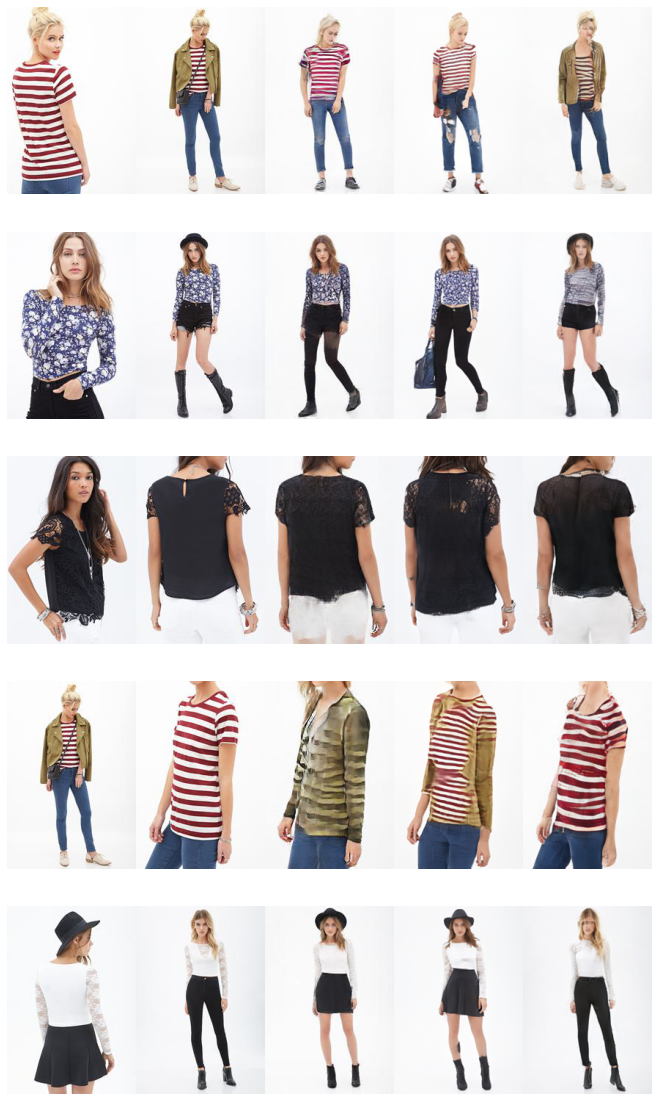

In [445]:
fig, axs = plt.subplots(5,1, figsize=(20, 20))
start_idx = 23
numbers = 5
for i, n_row in enumerate(range(start_idx*numbers, start_idx*numbers+numbers)):
    row = check_df.iloc[n_row]
    png_name = row.name
    jpg_name = png_name.replace('.png','.jpg')
    
    src = Image.open(root/'src'/png_name)
    target =  Image.open(root/'gt'/png_name)
    sample =  Image.open(root/'samples'/png_name)
    nted = Image.open(nted_root/png_name)
    casd = Image.open(casd_root/'samples'/jpg_name)
    
    concat = np.hstack([np.array(x) for x in [src, target, casd, nted, sample]])

    axs[i].imshow(concat)
    axs[i].axis('off')
    #axs[i].set_title(f'{n_row}.{row.name}:{row["ssim_diff_overall"]:.4f}')
    print(f'{n_row}.{row.name}')
    #axs[i].set_title(f"{row['name']}:{row['SSIM']:.4f}")

fashionWOMENCardigansid0000136902_1front___fashionWOMENCardigansid0000136902_7additional.png.fashionWOMENCardigansid0000136902_1front___fashionWOMENCardigansid0000136902_7additional.png
fashionWOMENCardigansid0000028401_1front___fashionWOMENCardigansid0000028401_3back.png.fashionWOMENCardigansid0000028401_1front___fashionWOMENCardigansid0000028401_3back.png
fashionWOMENRompers_Jumpsuitsid0000031402_1front___fashionWOMENRompers_Jumpsuitsid0000031402_7additional.png.fashionWOMENRompers_Jumpsuitsid0000031402_1front___fashionWOMENRompers_Jumpsuitsid0000031402_7additional.png
fashionWOMENCardigansid0000045005_3back___fashionWOMENCardigansid0000045005_1front.png.fashionWOMENCardigansid0000045005_3back___fashionWOMENCardigansid0000045005_1front.png
fashionWOMENSweatshirts_Hoodiesid0000432702_2side___fashionWOMENSweatshirts_Hoodiesid0000432702_4full.png.fashionWOMENSweatshirts_Hoodiesid0000432702_2side___fashionWOMENSweatshirts_Hoodiesid0000432702_4full.png
fashionWOMENJackets_Coatsid000001871

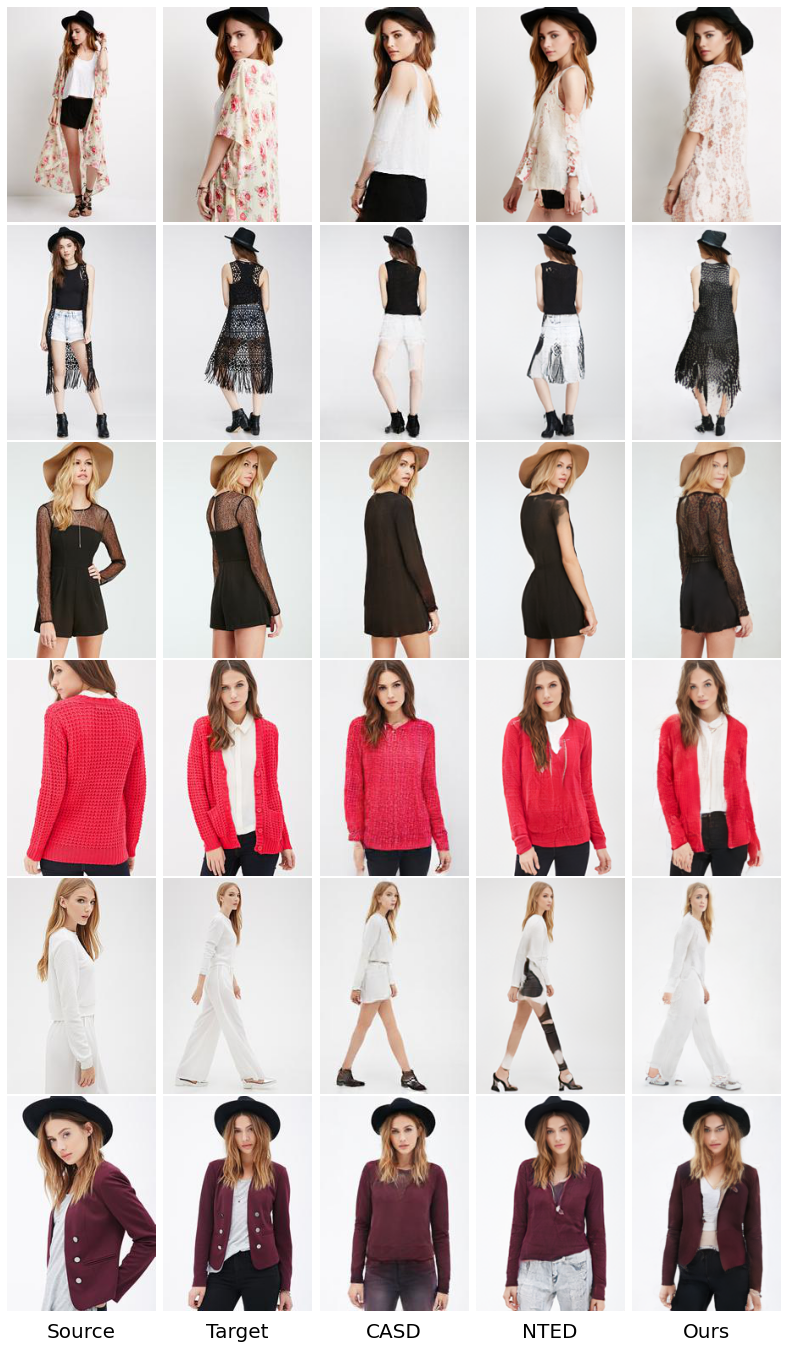

In [418]:
list_better_seg = [
                  'fashionWOMENCardigansid0000136902_1front___fashionWOMENCardigansid0000136902_7additional.png',
                   'fashionWOMENCardigansid0000028401_1front___fashionWOMENCardigansid0000028401_3back.png',
    'fashionWOMENRompers_Jumpsuitsid0000031402_1front___fashionWOMENRompers_Jumpsuitsid0000031402_7additional.png',
                   'fashionWOMENCardigansid0000045005_3back___fashionWOMENCardigansid0000045005_1front.png',
                  #'fashionWOMENTees_Tanksid0000387704_2side___fashionWOMENTees_Tanksid0000387704_1front.png', #glasses
                   'fashionWOMENSweatshirts_Hoodiesid0000432702_2side___fashionWOMENSweatshirts_Hoodiesid0000432702_4full.png',
                   'fashionWOMENJackets_Coatsid0000018710_1front___fashionWOMENJackets_Coatsid0000018710_7additional.png',
    #'fashionWOMENDressesid0000349902_7additional___fashionWOMENDressesid0000349902_4full.png'
]

display_selected(list_better_seg, 'figures/pt_1.png')

fashionWOMENSweatshirts_Hoodiesid0000432702_2side___fashionWOMENSweatshirts_Hoodiesid0000432702_4full.png.fashionWOMENSweatshirts_Hoodiesid0000432702_2side___fashionWOMENSweatshirts_Hoodiesid0000432702_4full.png
fashionWOMENTees_Tanksid0000584009_3back___fashionWOMENTees_Tanksid0000584009_1front.png.fashionWOMENTees_Tanksid0000584009_3back___fashionWOMENTees_Tanksid0000584009_1front.png


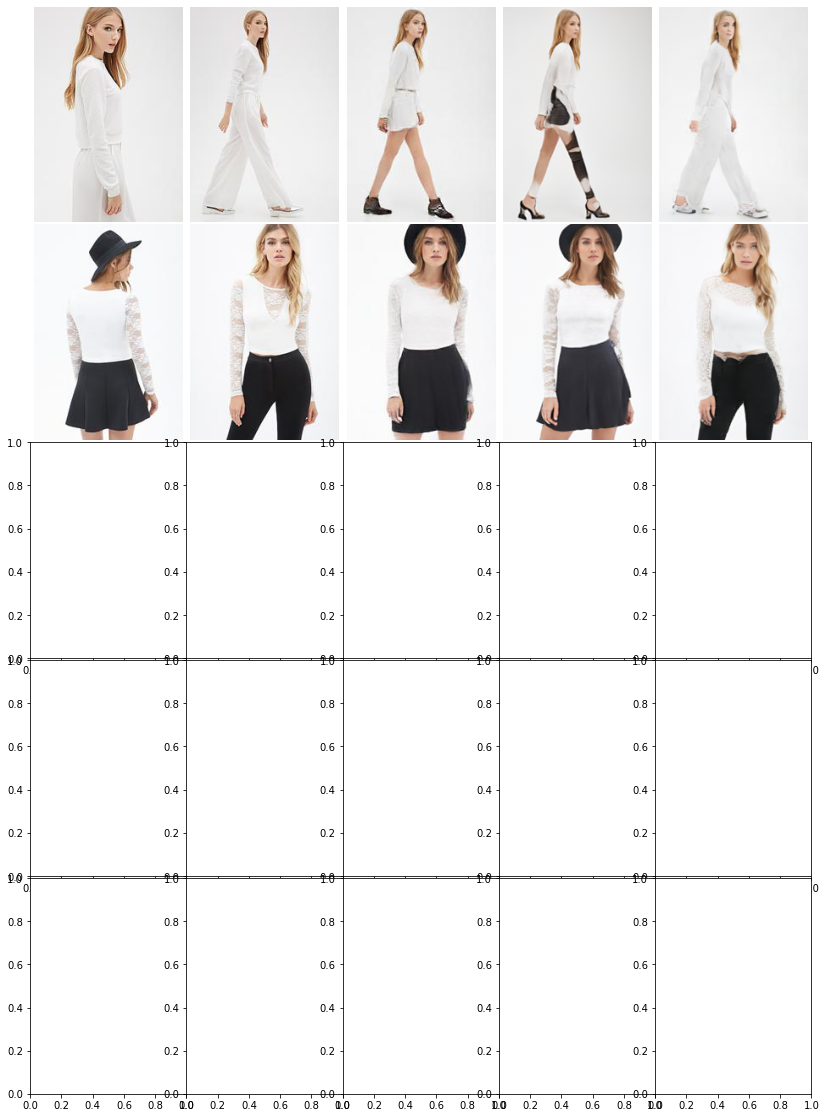

In [385]:
list_incomplete = [
    'fashionWOMENSweatshirts_Hoodiesid0000432702_2side___fashionWOMENSweatshirts_Hoodiesid0000432702_4full.png',
    'fashionWOMENTees_Tanksid0000584009_3back___fashionWOMENTees_Tanksid0000584009_1front.png',    
]
display_selected(list_incomplete)

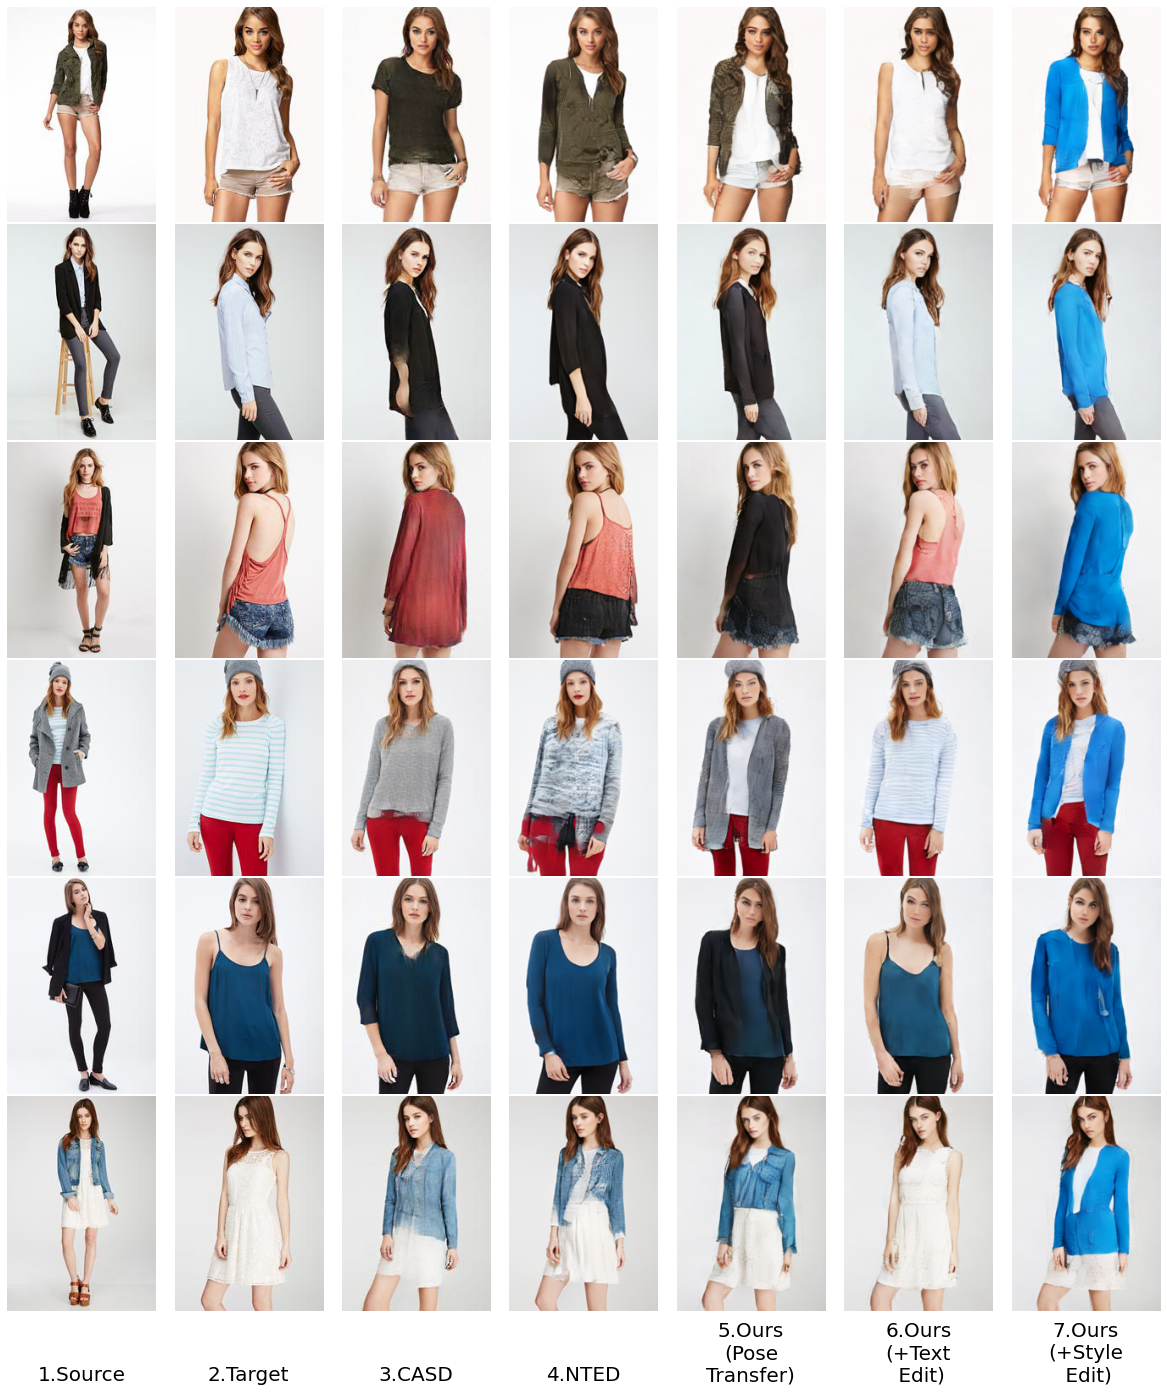

In [25]:
def display_edit(selected, save_path=None):
    text_edit_root = Path("./figures/text_edit/")
    style_edit_root = Path("./figures/style_edit/")
    number = max(5, len(selected))
    n_cols = 7
    fig, axs = plt.subplots(number, n_cols, figsize=(n_cols*3, number*4))
    fig.subplots_adjust(wspace=0, hspace=0.01)
    for i, n_row in enumerate(selected[:number]):
        row = df.loc[n_row]
        png_name = row.name
        jpg_name = png_name.replace('.png','.jpg')

        src = Image.open(root/'src'/png_name)
        target =  Image.open(root/'gt'/png_name)
        #smpl = Image.open(root/'smpl'/png_name)
        sample =  Image.open(root/'samples'/png_name)
        nted = Image.open(nted_root/png_name)
        casd = Image.open(casd_root/'samples'/jpg_name)
        
        text_edit =  Image.open(text_edit_root/png_name)
        style_edit =  Image.open(style_edit_root/png_name)

        for j in range(n_cols):
            axs[i,j].axis('off')
            
        axs[i,0].imshow(src)
        axs[i,1].imshow(target)
        axs[i,2].imshow(casd)
        axs[i,3].imshow(nted)
        axs[i,4].imshow(text_edit)
        axs[i,5].imshow(sample)
        axs[i,6].imshow(style_edit)

    for j, label in enumerate(['1.Source', '2.Target', '3.CASD', '4.NTED', '5.Ours\n(Pose\nTransfer)', '6.Ours\n(+Text\n Edit)', '7.Ours\n(+Style\n Edit)']):
        axs[i,j].set_title(label, y=-0.35, fontsize=20)
        
    if save_path:
        plt.savefig(save_path)
        print('Save to', save_path)

    
display_edit(list_jacket)

fashionWOMENShortsid0000478403_4full___fashionWOMENShortsid0000478403_1front.png.fashionWOMENShortsid0000478403_4full___fashionWOMENShortsid0000478403_1front.png
fashionWOMENBlouses_Shirtsid0000311501_7additional___fashionWOMENBlouses_Shirtsid0000311501_2side.png.fashionWOMENBlouses_Shirtsid0000311501_7additional___fashionWOMENBlouses_Shirtsid0000311501_2side.png
fashionWOMENTees_Tanksid0000298802_4full___fashionWOMENTees_Tanksid0000298802_1front.png.fashionWOMENTees_Tanksid0000298802_4full___fashionWOMENTees_Tanksid0000298802_1front.png
fashionWOMENTees_Tanksid0000397106_7additional___fashionWOMENTees_Tanksid0000397106_1front.png.fashionWOMENTees_Tanksid0000397106_7additional___fashionWOMENTees_Tanksid0000397106_1front.png
fashionWOMENTees_Tanksid0000664503_4full___fashionWOMENTees_Tanksid0000664503_3back.png.fashionWOMENTees_Tanksid0000664503_4full___fashionWOMENTees_Tanksid0000664503_3back.png
fashionWOMENDressesid0000651901_4full___fashionWOMENDressesid0000651901_2side.png.fashionW

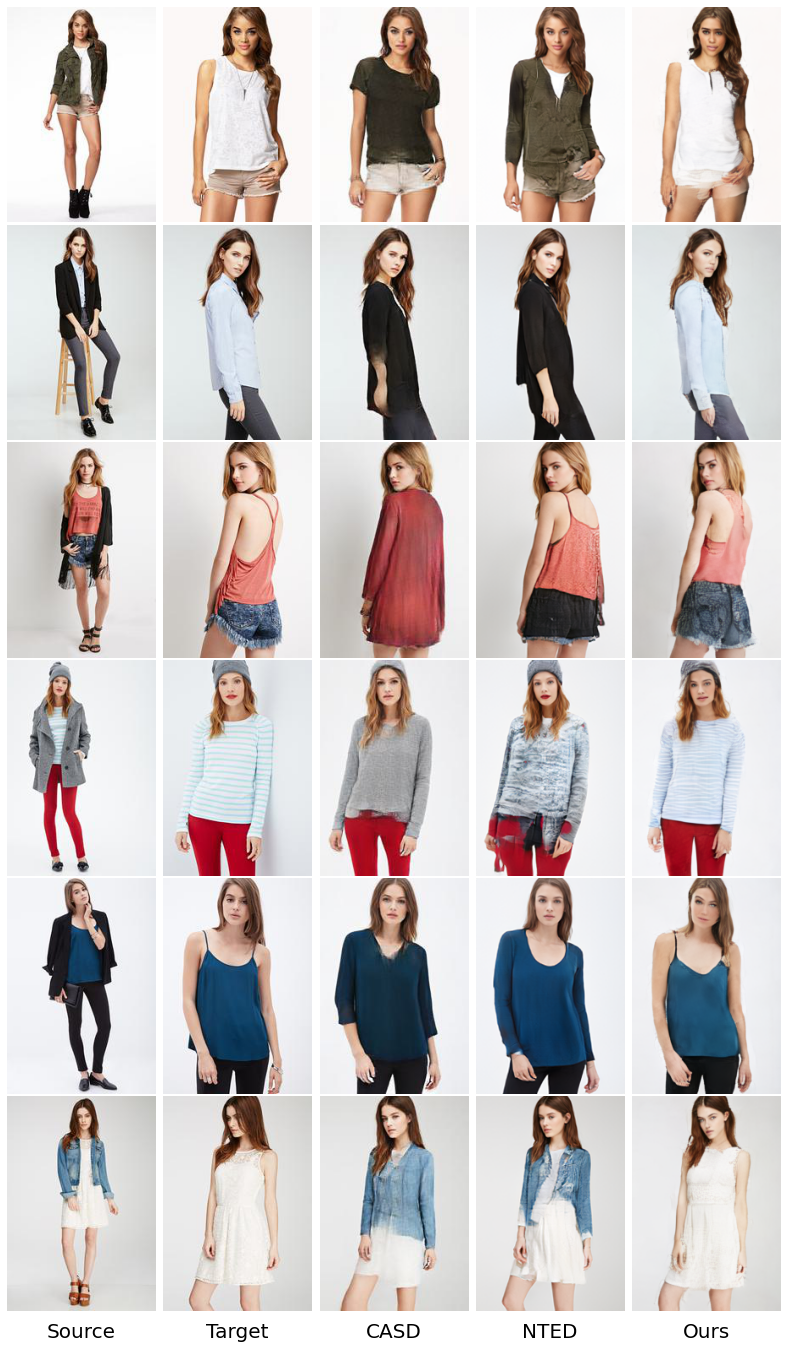

In [16]:
list_jacket = ['fashionWOMENShortsid0000478403_4full___fashionWOMENShortsid0000478403_1front.png',
'fashionWOMENBlouses_Shirtsid0000311501_7additional___fashionWOMENBlouses_Shirtsid0000311501_2side.png',
               'fashionWOMENTees_Tanksid0000298802_4full___fashionWOMENTees_Tanksid0000298802_1front.png',
#'fashionWOMENTees_Tanksid0000788404_4full___fashionWOMENTees_Tanksid0000788404_2side.png',
'fashionWOMENTees_Tanksid0000397106_7additional___fashionWOMENTees_Tanksid0000397106_1front.png',
              'fashionWOMENTees_Tanksid0000664503_4full___fashionWOMENTees_Tanksid0000664503_3back.png',
              'fashionWOMENDressesid0000651901_4full___fashionWOMENDressesid0000651901_2side.png']
#display_selected(list_jacket, 'figures/pt_2.png')
display_edit(list_jacket, )

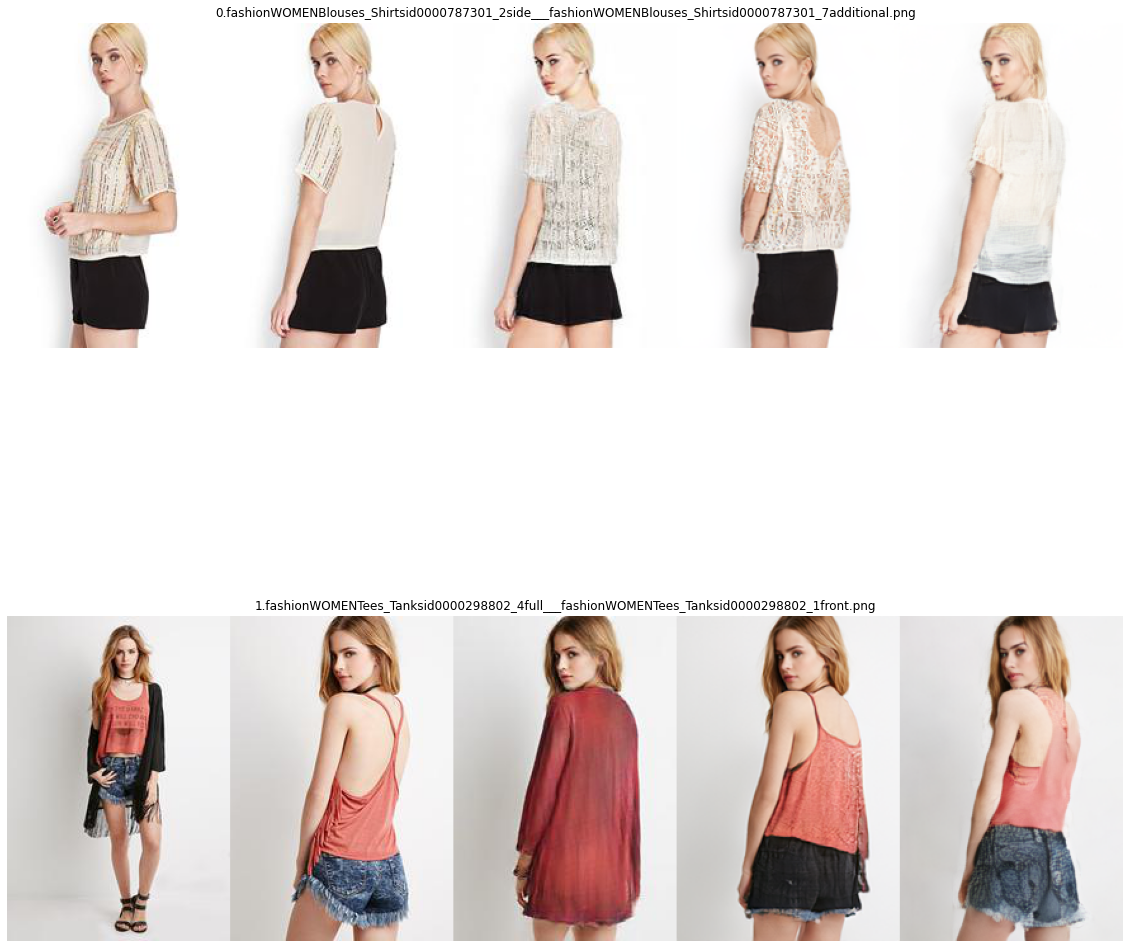

In [271]:
selected = [
    

    

'fashionWOMENBlouses_Shirtsid0000787301_2side___fashionWOMENBlouses_Shirtsid0000787301_7additional.png',
#'fashionWOMENTees_Tanksid0000298802_4full___fashionWOMENTees_Tanksid0000298802_7additional.png',



]

display_selected(selected)

In [311]:
def display_selected(selected):
    number = max(5, len(selected))

    fig, axs = plt.subplots(number,1, figsize=(20, 20))

    for i, n_row in enumerate(selected):
        row = df.loc[n_row]

        png_name = row.name
        jpg_name = png_name.replace('.png','.jpg')

        src = Image.open(root/'src'/png_name)
        target =  Image.open(root/'gt'/png_name)
        sample =  Image.open(root/'samples'/png_name)
        nted = Image.open(nted_root/png_name)
        casd = Image.open(casd_root/'samples'/jpg_name)

        concat = np.hstack([np.array(x) for x in [src, target, casd, nted, sample]])

        axs[i].imshow(concat)
        axs[i].axis('off')
        axs[i].set_title(f'{i}.{row.name}')
        #axs[i].set_title(f"{row['name']}:{row['SSIM']:.4f}")

In [25]:
my_df.iloc[0]['name']

'fashionMENTees_Tanksid0000678701_2side__fashionMENTees_Tanksid0000678701_1front_vis.jpg'

In [32]:
'fashionWOMENJackets_Coatsid0000745002_3back__fashionWOMENJackets_Coatsid0000745002_4full_vis.jpg' in list(my_df['name'])

True

In [15]:
df = pd.read_csv(root/'metrics.csv')

In [13]:
metric = 'SSIM'
df.sort_values(by=[metric], ascending=metric=='SSIM')[metric][:].mean()

0.702466618192924

In [69]:
df.head()

name      SSIM     LPIPS
0  1970.jpg  0.714059  0.190592
1  6314.jpg  0.777368  0.141038
2  2223.jpg  0.777880  0.148453
3  4972.jpg  0.829399  0.109999
4   678.jpg  0.529387  0.243801

In [56]:
sklearn_ssim = []
for i in tqdm(range(len(df))):
    fname = df.iloc[i]['name']
    sample = np.array(Image.open(root/f'samples/{fname}'))
    gt = np.array(Image.open(root/f'gt/{fname}'))
    sklearn_ssim.append(ssim(gt, sample, multichannel=True,
                             data_range=255))
    
print(np.mean(sklearn_ssim))

100%|███████████████████████████████████████████████████████████████████████████████████████████████| 8107/8107 [00:42<00:00, 188.83it/s]

0.6981076345080555


## SSIM

In [91]:
index = 2033
sample = np.array(Image.open(root/f'samples/{index}.jpg'))
gt = np.array(Image.open(root/f'gt/{index}.jpg'))
ssim(gt, sample, data_range=255, multichannel=True)

0.2780282292390281

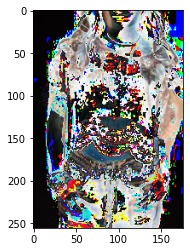

In [92]:
plt.imshow(sample-gt)

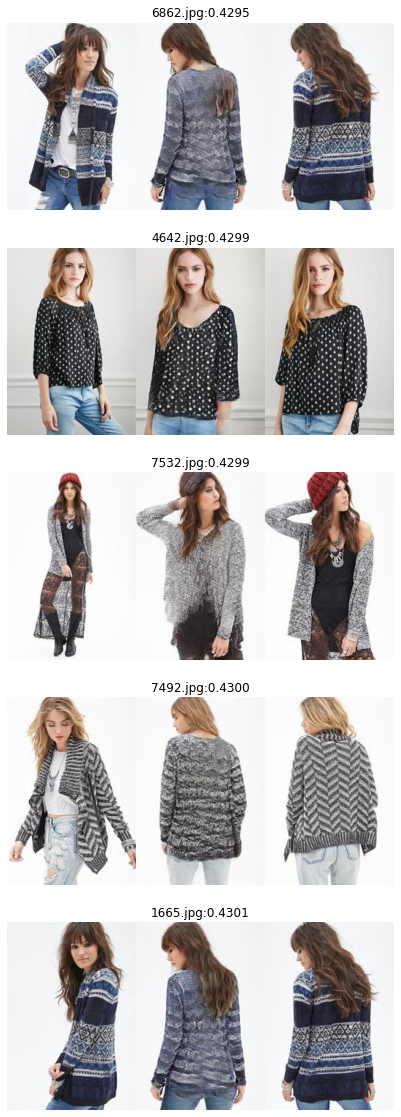

In [32]:
i = 80
check_df = df.sort_values(by=['SSIM'])[i:i+5]
fig, axs = plt.subplots(len(check_df),1, figsize=(20, 20))
for i in range(len(check_df)):
    row = check_df.iloc[i]
    image = Image.open(root/'concats'/row['name'])
    axs[i].imshow(image)
    axs[i].axis('off')
    axs[i].set_title(f"{row['name']}:{row['SSIM']:.4f}")

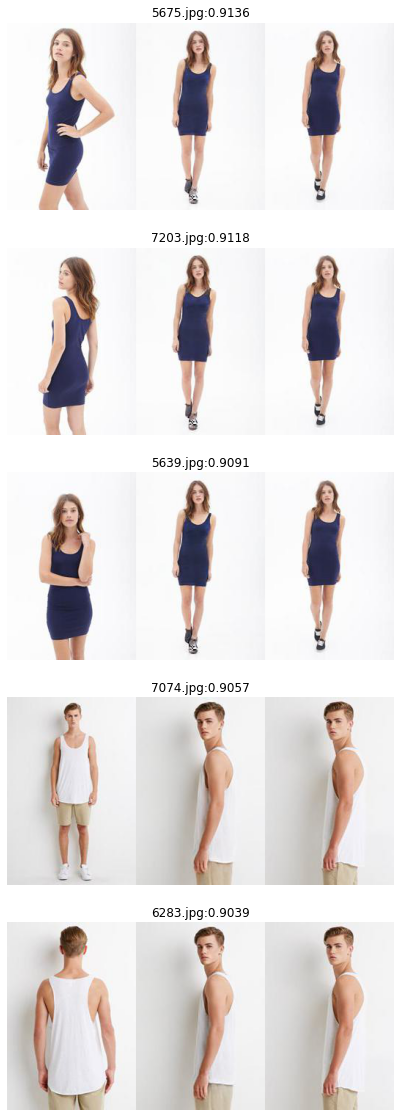

In [38]:
i = 0
check_df = df.sort_values(by=['SSIM'], ascending=False)[i:i+5]
fig, axs = plt.subplots(len(check_df),1, figsize=(20, 20))
for i in range(len(check_df)):
    row = check_df.iloc[i]
    image = Image.open(root/'concats'/row['name'])
    axs[i].imshow(image)
    axs[i].axis('off')
    axs[i].set_title(f"{row['name']}:{row['SSIM']:.4f}")

## LPIPS

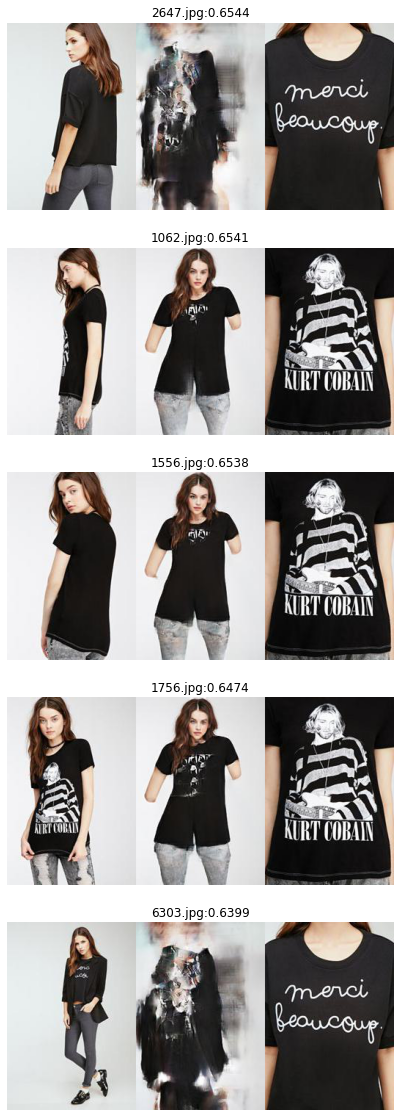

In [39]:
i = 0
check_df = df.sort_values(by=['LPIPS'], ascending=False)[i:i+5]
fig, axs = plt.subplots(len(check_df),1, figsize=(20, 20))
for i in range(len(check_df)):
    row = check_df.iloc[i]
    image = Image.open(root/'concats'/row['name'])
    axs[i].imshow(image)
    axs[i].axis('off')
    axs[i].set_title(f"{row['name']}:{row['LPIPS']:.4f}")
    

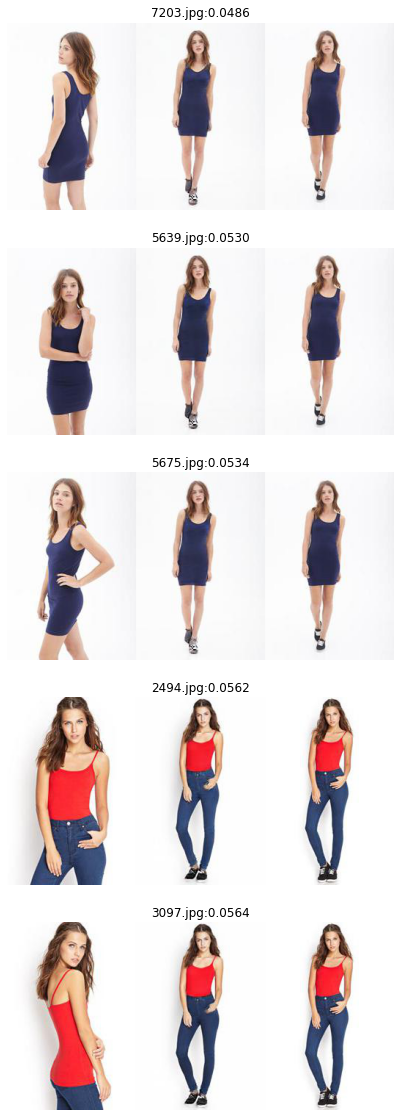

In [40]:
i = 0
check_df = df.sort_values(by=['LPIPS'])[i:i+5]
fig, axs = plt.subplots(len(check_df),1, figsize=(20, 20))
for i in range(len(check_df)):
    row = check_df.iloc[i]
    image = Image.open(root/'concats'/row['name'])
    axs[i].imshow(image)
    axs[i].axis('off')
    axs[i].set_title(f"{row['name']}:{row['LPIPS']:.4f}")
    
    

In [ ]:
class Loader(Dataset):
    def __init__(self, folder, shuffle=False):
        super().__init__()
        self.shuffle = shuffle
   
    def __len__(self):
        return len(self.images)
    
    def random_sample(self):
        return self.__getitem__(randint(0, self.__len__() - 1))

    def sequential_sample(self, ind):
        if ind >= self.__len__() - 1:
            return self.__getitem__(0)
        return self.__getitem__(ind + 1)

    def skip_sample(self, ind):
        if self.shuffle:
            return self.random_sample()
        return self.sequential_sample(ind=ind)

    @abstractmethod
    def __getitem__(self, ind):
        pass

In [12]:
src_root = Path('/home/soon/datasets/deepfashion_inshop/img_256')
dst_root = Path('/home/soon/datasets/deepfashion_inshop/pose_transfer_gt')
#os.makedirs(dst_root)

In [19]:
gt_files = glob(str(dst_root/'*.jpg'))

In [20]:
gt_files.sort()

In [21]:
gt_files

['/home/soon/datasets/deepfashion_inshop/pose_transfer_gt/0.jpg',
 '/home/soon/datasets/deepfashion_inshop/pose_transfer_gt/1.jpg',
 '/home/soon/datasets/deepfashion_inshop/pose_transfer_gt/10.jpg',
 '/home/soon/datasets/deepfashion_inshop/pose_transfer_gt/100.jpg',
 '/home/soon/datasets/deepfashion_inshop/pose_transfer_gt/1000.jpg',
 '/home/soon/datasets/deepfashion_inshop/pose_transfer_gt/1001.jpg',
 '/home/soon/datasets/deepfashion_inshop/pose_transfer_gt/1002.jpg',
 '/home/soon/datasets/deepfashion_inshop/pose_transfer_gt/1003.jpg',
 '/home/soon/datasets/deepfashion_inshop/pose_transfer_gt/1004.jpg',
 '/home/soon/datasets/deepfashion_inshop/pose_transfer_gt/1005.jpg',
 '/home/soon/datasets/deepfashion_inshop/pose_transfer_gt/1006.jpg',
 '/home/soon/datasets/deepfashion_inshop/pose_transfer_gt/1007.jpg',
 '/home/soon/datasets/deepfashion_inshop/pose_transfer_gt/1008.jpg',
 '/home/soon/datasets/deepfashion_inshop/pose_transfer_gt/1009.jpg',
 '/home/soon/datasets/deepfashion_inshop/po

In [6]:
df = pd.read_csv('pairs-test.csv')
files = df.to

In [15]:
for i, f in tqdm(enumerate(files[:])):
    src = str(src_root/f)
    dst = str(dst_root/f'{i}.jpg')
    copy(src, dst)

8175it [00:00, 20775.33it/s]


In [76]:
ind = 4
sample = df.iloc[ind]
image_file = str(root_dir / sample.image)


In [77]:
face_files = image_file.replace(folder, face_folder)
face_folder = os.path.dirname(face_files)
face_embed_files = glob(os.path.join(face_folder,'*.p'))
face_embed_file = random.choice(face_embed_files)
face_file = face_file.replace('.p', '.jpg')


print(face_file)

/home/soon/datasets/deepfashion/inshop_vggface/WOMEN/Sweaters/id_00005229
/home/soon/datasets/deepfashion/inshop_vggface//WOMEN/Sweaters/id_00005229/WOMEN/Sweaters/id_00005229/03_2_side.jpg


In [78]:
face_embed_file

'/home/soon/datasets/deepfashion/inshop_vggface/WOMEN/Sweaters/id_00005229/03_2_side.p'

In [50]:
!ls $folder

MEN  MEN.zip  smpl  WOMEN  WOMEN.zip


In [51]:
image_file

'/home/soon/datasets/deepfashion_inshop/img/WOMEN/Sweaters/id_00005229/03_2_side.jpg'

In [52]:
folder

'/home/soon/datasets/deepfashion_inshop/img'

In [53]:
face_file

'/home/soon/datasets/deepfashion/inshop_vggface//WOMEN/Sweaters/id_00005229/03_2_side.jpg'

In [54]:
face_folder

'/home/soon/datasets/deepfashion/inshop_vggface//WOMEN/Sweaters/id_00005229'

In [55]:
face_file = image_file.replace(folder, face_folder)

In [56]:
image_file

'/home/soon/datasets/deepfashion_inshop/img/WOMEN/Sweaters/id_00005229/03_2_side.jpg'

In [57]:
folder

'/home/soon/datasets/deepfashion_inshop/img'

In [58]:
face_folder

'/home/soon/datasets/deepfashion/inshop_vggface//WOMEN/Sweaters/id_00005229'

In [59]:
face_file

'/home/soon/datasets/deepfashion/inshop_vggface//WOMEN/Sweaters/id_00005229/WOMEN/Sweaters/id_00005229/03_2_side.jpg'